# WalkTEMにおける任意送信電流波形のテスト2

- Ver. 0
- 松本（2020）式

In [1]:
import sys

sys.path.append('../')
import emulatte.forward as fwd
from emulatte.core.arbitraywave import ArbitraryWave
from emulatte.core.waveforms import load_waveform
import matplotlib.pyplot as plt
import numpy as np

# empymod
import empymod

In [2]:
# 波形データの読み込み（walktem）
lm_off_time, lm_waveform_time, lm_waveform_current = load_waveform('walktem', 'lm')
hm_off_time, hm_waveform_time, hm_waveform_current = load_waveform('walktem', 'hm')

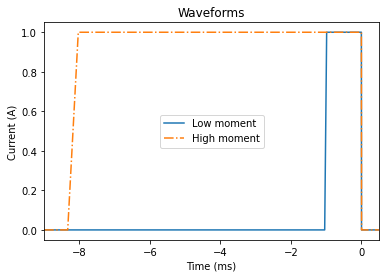

In [3]:
plt.figure()
plt.title('Waveforms')
plt.plot(np.r_[-9, lm_waveform_time * 1e3, 2], np.r_[0, lm_waveform_current, 0],
         label='Low moment')
plt.plot(np.r_[-9, hm_waveform_time * 1e3, 2], np.r_[0, hm_waveform_current, 0],
         '-.', label='High moment')

plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.xlim([-9, 0.5])
plt.legend()

plt.show()

In [4]:
# Resistive model
thicks = [75]  # Thickness
res = [2e14, 500, 20]  # Resistivity
props = {'res': res}

model = fwd.model(thicks)
model.set_properties(**props)

# lm_walktem_em = ArbitraryWave.walktem(lm_off_time, lm_waveform_time, lm_waveform_current, model)
lm_walktem_em = ArbitraryWave.walktem(lm_off_time, lm_waveform_time, lm_waveform_current, model)
hm_walktem_em = ArbitraryWave.walktem(hm_off_time, hm_waveform_time, hm_waveform_current, model)

In [5]:
# empymod
lm_empymod_res = np.array([
    8.14218268e-06, 4.46984007e-06, 2.92208083e-06, 2.11529375e-06,
    1.56927779e-06, 1.20607369e-06, 9.53751971e-07, 7.53986158e-07,
    5.87793000e-07, 4.57025556e-07, 3.56024974e-07, 2.72762517e-07,
    2.05863539e-07, 1.52414321e-07, 1.10747254e-07, 7.96298130e-08,
    5.59871132e-08, 3.86694237e-08, 2.62865492e-08, 1.74649155e-08,
    1.13645730e-08, 7.23349474e-09, 4.50384949e-09])
hm_empymod_res = np.array([
    1.56336749e-07, 1.13922961e-07, 8.23064473e-08, 5.82886555e-08,
    4.06764905e-08, 2.80458908e-08, 1.89971859e-08, 1.26827618e-08,
    8.34640796e-09, 5.42046714e-09, 3.47327640e-09, 2.19662491e-09,
    1.37102703e-09, 8.46048711e-10, 5.15603755e-10, 3.09799987e-10,
    1.83708356e-10, 1.07236997e-10, 6.15630158e-11, 3.47766437e-11])

# AarhusInv
lm_aarhus_res = np.array([
    7.980836E-06, 4.459270E-06, 2.909954E-06, 2.116353E-06, 1.571503E-06,
    1.205928E-06, 9.537814E-07, 7.538660E-07, 5.879494E-07, 4.572059E-07,
    3.561824E-07, 2.727531E-07, 2.058368E-07, 1.524225E-07, 1.107586E-07,
    7.963634E-08, 5.598970E-08, 3.867087E-08, 2.628711E-08, 1.746382E-08,
    1.136561E-08, 7.234771E-09, 4.503902E-09
])
hm_aarhus_res = np.array([
    1.563517e-07, 1.139461e-07, 8.231679e-08, 5.829438e-08, 4.068236e-08,
    2.804896e-08, 1.899818e-08, 1.268473e-08, 8.347439e-09, 5.420791e-09,
    3.473876e-09, 2.196246e-09, 1.372012e-09, 8.465165e-10, 5.155328e-10,
    3.099162e-10, 1.836829e-10, 1.072522e-10, 6.161256e-11, 3.478720e-11
])

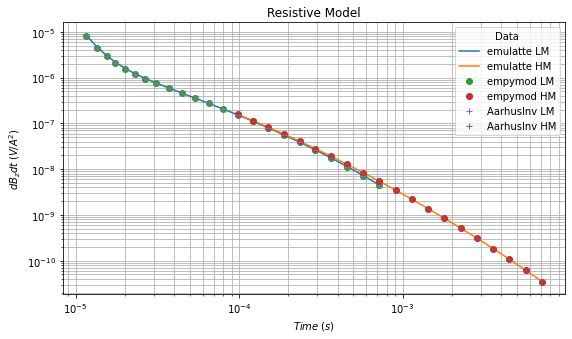

In [6]:
plt.figure(figsize=(9, 5))
plt.title('Resistive Model')

# emulatte (after waveform)
plt.loglog(lm_off_time, lm_walktem_em, label="emulatte LM")
plt.loglog(hm_off_time, hm_walktem_em, label="emulatte HM")

# empymod
plt.loglog(lm_off_time, lm_empymod_res, 'o', label="empymod LM")
plt.loglog(hm_off_time, hm_empymod_res, 'o', label="empymod HM")

# AarhusInv
plt.loglog(lm_off_time, lm_aarhus_res, '+', label='AarhusInv LM')
plt.loglog(hm_off_time, hm_aarhus_res, '+', label='AarhusInv HM')

# Plot settings
plt.xlabel(r"$Time\;(s)$")
plt.ylabel(r"$dB_zdt\;(V/A^2)$")
plt.grid(which='both')
plt.legend(title='Data')

plt.show()